# Imports

In [24]:
# Data Analysis
import numpy as np
from sklearn.model_selection import train_test_split

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [19]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

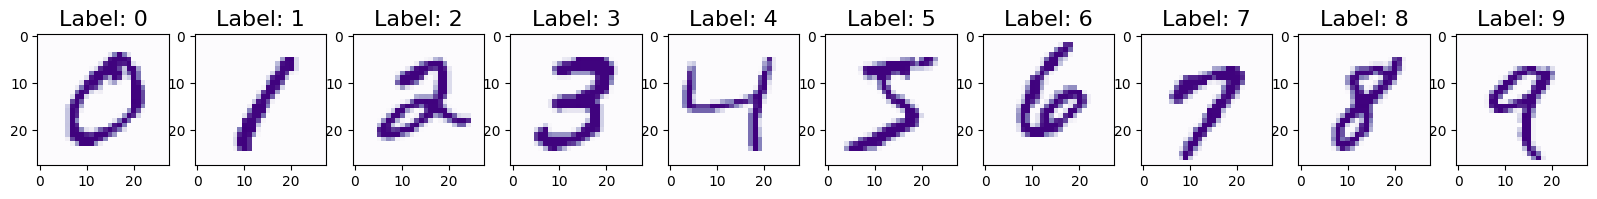

In [21]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='Purples')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [22]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [25]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [26]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [27]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Prepare ***Data***

In [28]:
# Normalize Data
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [29]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(48000, 784)


## ***Create Model - Fully Connected Neural Network***:

In [30]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train

In [32]:
batch_size = 512
epochs=20


# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs , callbacks=[early_stopping])

Epoch 1/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0810 - val_accuracy: 0.9758
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0512 - accuracy: 0.9849 - val_loss: 0.0835 - val_accuracy: 0.9748
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0813 - val_accuracy: 0.9749


# Evaluate

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0758 - accuracy: 0.9776
Test Loss: 0.07584510743618011, Test Accuracy: 0.9775999784469604


In [34]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[2.78302900e-06 2.34036247e-06 4.88509249e-05 ... 9.99483705e-01
  2.29702709e-06 3.38903956e-05]
 [1.41396754e-07 1.07578991e-03 9.98909593e-01 ... 1.30342492e-08
  4.87143325e-06 5.93839811e-10]
 [2.71807894e-05 9.97416377e-01 2.20776987e-04 ... 1.30843173e-03
  3.45105713e-04 2.18391287e-05]
 ...
 [1.28655808e-09 9.49697121e-09 1.01113729e-10 ... 5.41767940e-06
  2.55300819e-07 2.85247756e-06]
 [1.34794425e-08 3.87677552e-08 2.32896635e-09 ... 4.37711307e-08
  4.62849948e-06 2.40764431e-09]
 [1.01916457e-08 1.03461351e-09 2.67444804e-08 ... 2.86465521e-11
  1.65081826e-09 1.47977394e-11]]
[7 2 1 ... 4 5 6]


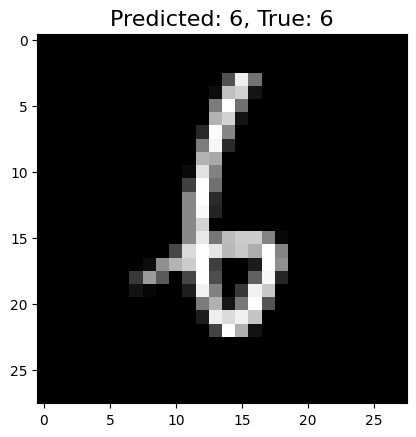

In [35]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

***# Confusion Matrix***

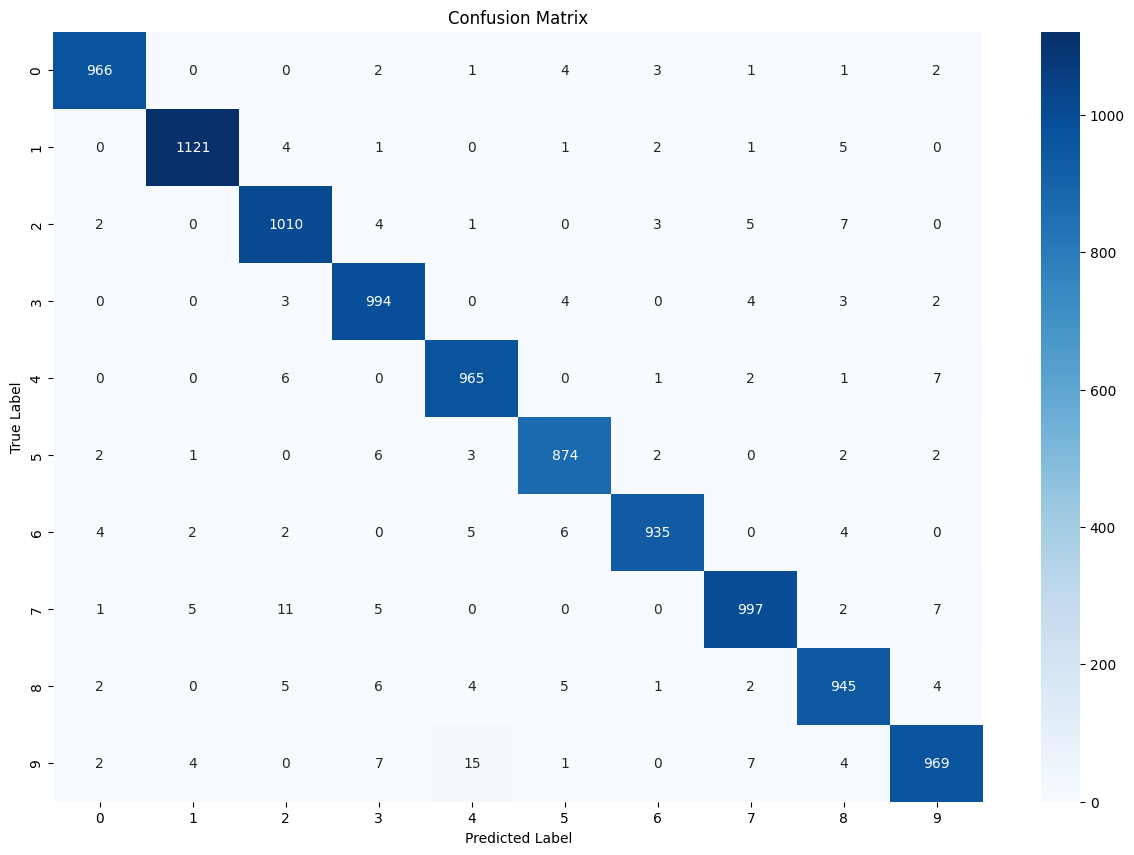

In [36]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate Some Errors

In [37]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [38]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

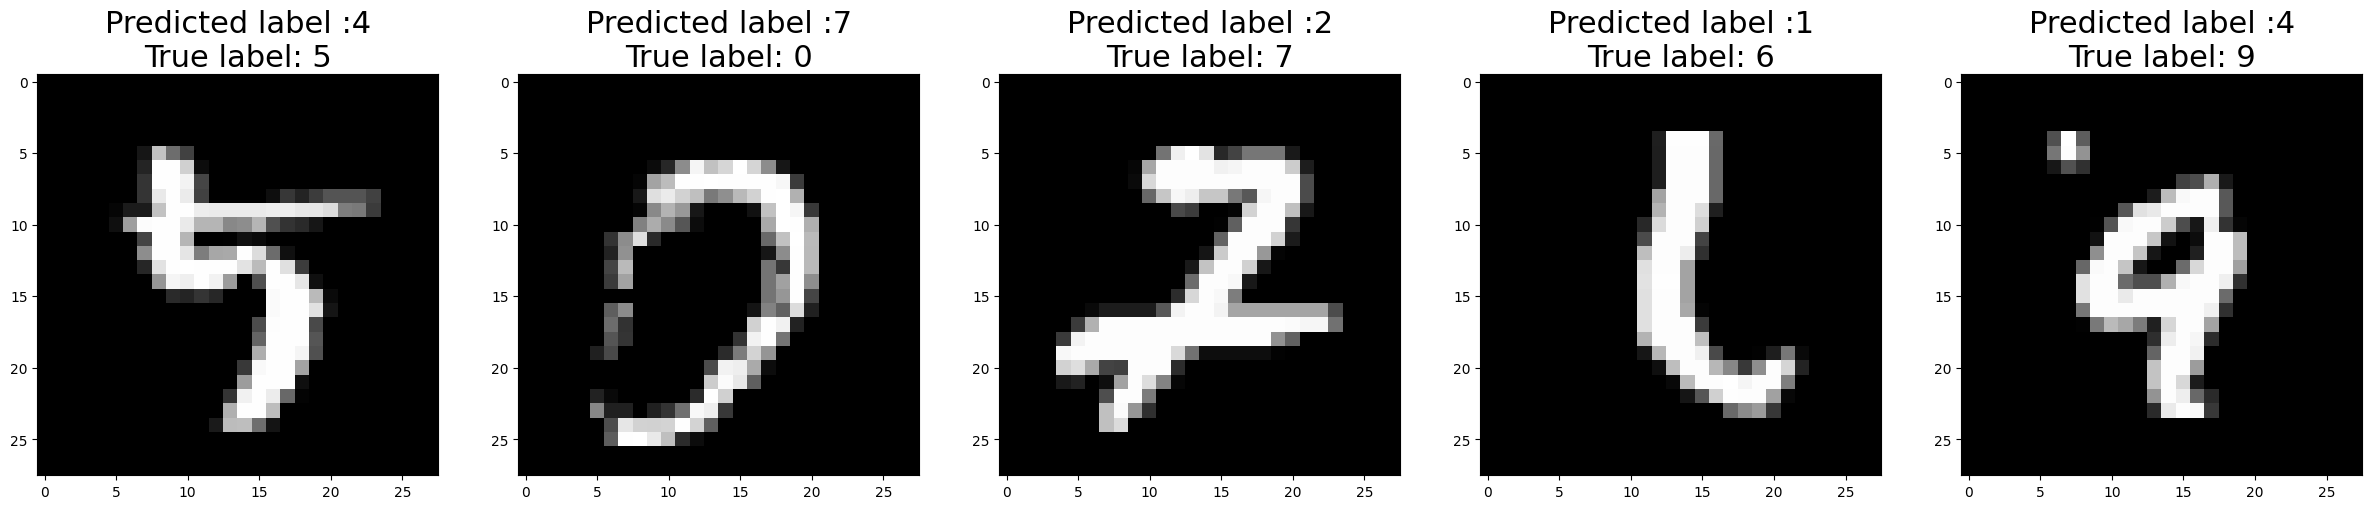

In [39]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)